In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

### Load the dataset

In [ ]:
df = pd.read_csv("IPL_Matches_2008_2022.csv")

In [27]:
df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [12]:
df.shape

(950, 20)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [14]:
#drop the method feature as becuase many such null values are there 
df2 = df.drop(['method'],axis=1)

In [15]:
df2.shape

(950, 19)

### Most wins in ipl

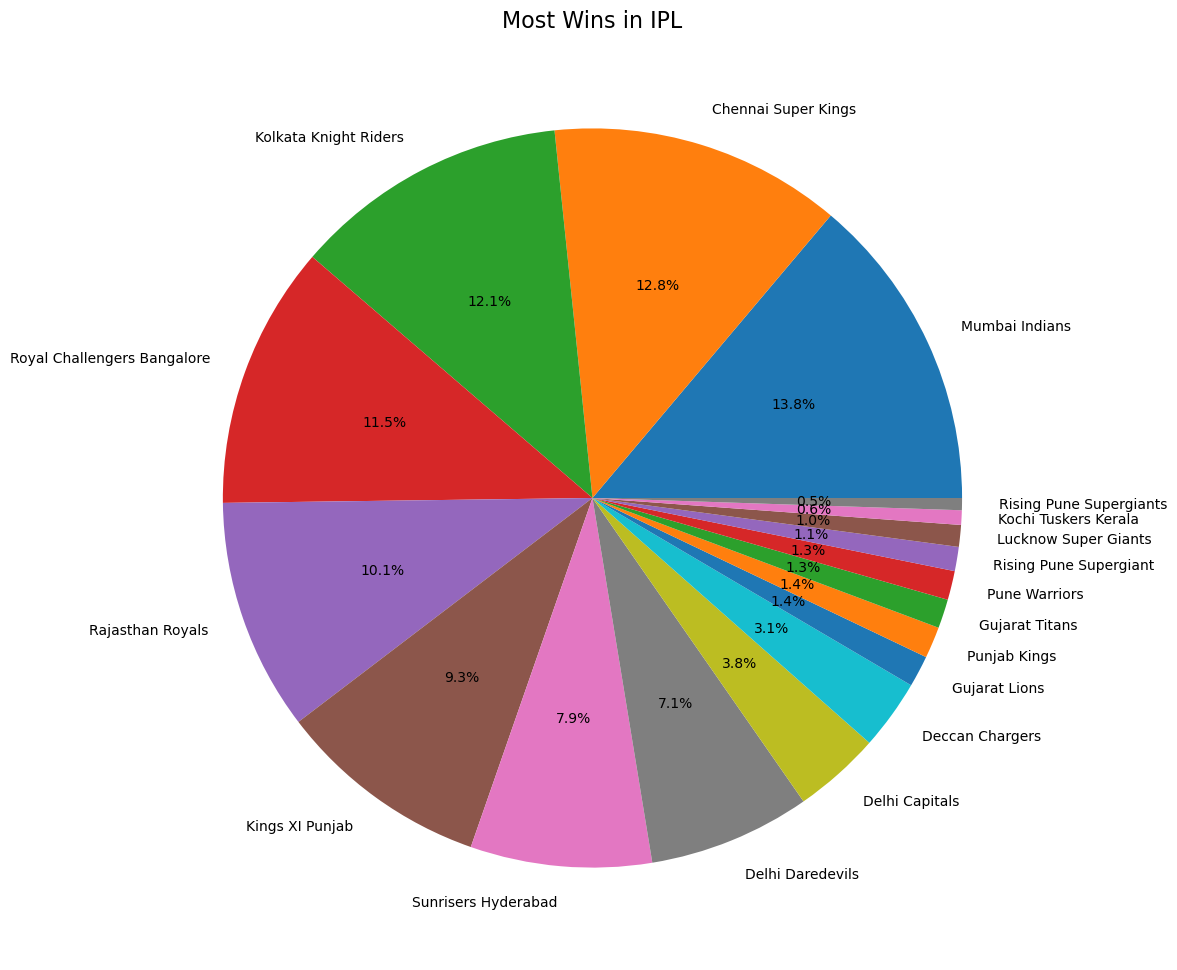

In [16]:
temp = pd.DataFrame({"Winner":df["WinningTeam"]})
count_wins = temp.value_counts()
#count_wins
labels = [X[0] for X in count_wins.keys()]
bar, ax = plt.subplots(figsize=(20,12))
ax = plt.pie(x=count_wins ,autopct = "%.1f%%", labels= labels)
plt.title("Most Wins in IPL", fontsize=16)
plt.show()

### Toss Decision

In [17]:
teams = df['TossWinner'].unique()
decision_making = pd.DataFrame([],columns=['TossWinner','Decision','Times'])
for id,element in enumerate(teams):
    temp_bat = df[(df['TossWinner']==element)& (df['TossDecision']=='bat')]
    temp_ball = df[(df['TossWinner']==element)& (df['TossDecision']=='field')]
    
    #append to decision making 
    decision_making = decision_making.append({'TossWinner':element,'Decision':'bat','Times':temp_bat['TossWinner'].count()}
                                            ,ignore_index= True)
    decision_making = decision_making.append({'TossWinner':element,'Decision':'field','Times':temp_bat['TossWinner'].count()}
                            ,ignore_index = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18896\3288366536.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decision_making = decision_making.append({'TossWinner':element,'Decision':'bat','Times':temp_bat['TossWinner'].count()}
C:\Users\HP\AppData\Local\Temp\ipykernel_18896\3288366536.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decision_making = decision_making.append({'TossWinner':element,'Decision':'field','Times':temp_bat['TossWinner'].count()}
C:\Users\HP\AppData\Local\Temp\ipykernel_18896\3288366536.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decision_making = decision_making.append({'TossWinner':element,'Decision':'bat','Times':temp_bat['TossWinner'].count()}
C:\Users\HP\AppData\Local\Temp\ipykernel

In [18]:
decision_making

,TossWinner,Decision,Times
0,Rajasthan Royals,bat,37
1,Rajasthan Royals,field,37
2,Lucknow Super Giants,bat,2
3,Lucknow Super Giants,field,2
4,Gujarat Titans,bat,4
5,Gujarat Titans,field,4
6,Sunrisers Hyderabad,bat,28
7,Sunrisers Hyderabad,field,28
8,Mumbai Indians,bat,51
9,Mumbai Indians,field,51


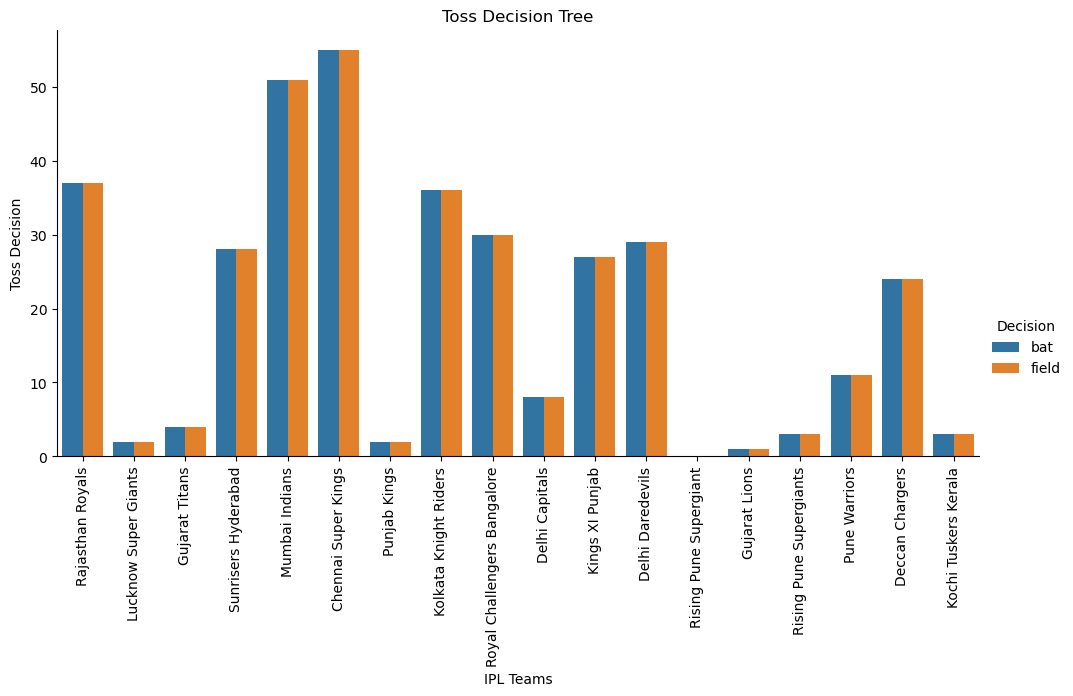

In [26]:
sns.catplot(x="TossWinner", y='Times', hue="Decision", data=decision_making, kind="bar", height=5, aspect=2)
plt.xticks(rotation=90)
plt.title("Toss Decision Tree")
plt.xlabel("IPL Teams")
plt.ylabel("Toss Decision")
plt.show()

### Famous Venue

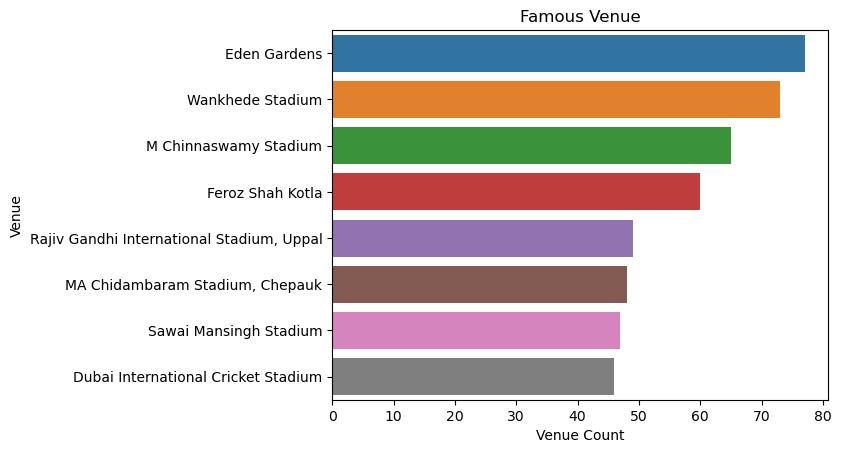

In [30]:
sns.barplot(x = df['Venue'].value_counts().head(8).values,
           y =  df['Venue'].value_counts().head(8).index,
           data = df)
plt.title("Famous Venue")
plt.xlabel("Venue Count")
plt.ylabel("Venue")
plt.show()

### Top 5 Umpire_1

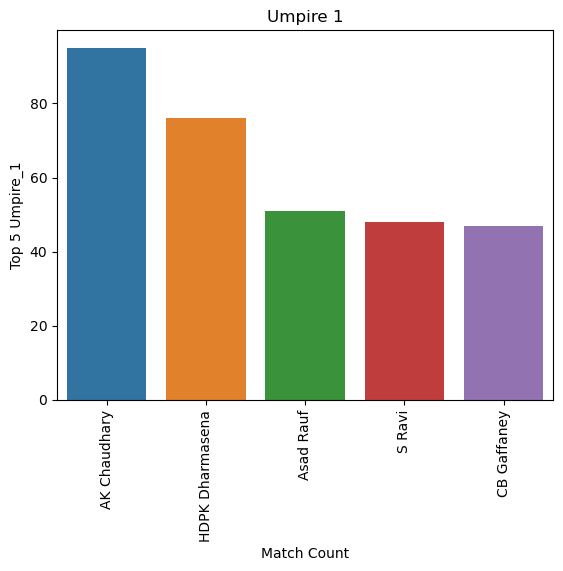

In [34]:
sns.barplot(x = df['Umpire1'].value_counts().head(5).index,
           y =  df['Umpire1'].value_counts().head(5).values,
           data = df)
plt.xticks(rotation=90)
plt.title("Umpire 1")
plt.xlabel("Match Count")
plt.ylabel("Top 5 Umpire_1")
plt.show()